# นาย ธภัทร มีชัยธนา รหัส 6402539
# ข้อมูล dataset https://www.kaggle.com/datasets/maso0dahmed/gun-deaths-in-america-cdc/

# สร้างตัวแปรแล้วทำการ Connect server service ของ MongoDB ที่ทำการ import มาจาก pymongo
# แล้วทำการสร้างตัวแปรที่ใส่ชื่อฐานข้อมูลแล้วเก็บไว้ในตัวแปร และ ใช้ตัวแปรที่เก็บชื่อฐานข้อมูลมากำหนดชื่อของ collection แล้วเก็บในอีกตัวแปรนึง

In [5]:
from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27017/')

mydb = client['6402539_Final']
mycol = mydb['Gun_Deaths_In_America']


# import pandas และ json เพื่อ ใช้ pd ในการอ่านไฟล์ dataset และ ใช้ json ทำการแปลงข้อมูลเป็น json แล้ว insert ข้อมูลที่ถูกแปลงเป็น json ลงไปในตัวแปรที่เก็บข้อมูลฐานข้อมูลเอาไว้

In [6]:
import pandas as pd
import json
# df = pd.read_csv('Dataset/gun_deaths.csv')
# d_json = json.loads(df.to_json(orient='records'))
# mycol.insert_many(d_json)

# สร้างตัวแปร แล้วเก็บ ค่าจากตัวแปร mycol แล้วใช่ medthod find หาข้อมูลจาก mycol ที่กำหนด database ไว้อยู่แล้ว มาเก็บไว้ใน ตัวแปร
# พร้อมกับสร้างตัวแปรมาเก็บข้อมูลที่ทำการหา มาแปลงเป็น Dataframe เพื่อเอามาวิเคราห์ พร้อมกับ 
# แล้ว drop column id เพื่อจะเอามา plot graph

In [7]:
from pymongo import MongoClient
filter={
    'age': {
        '$gte': 0
    }
}
project={
    '_id': 0, 
    'age': 1, 
}
sort=list({
    'age': 1
}.items())
result1 = mycol.find(
  filter=filter,
  projection=project,
  sort=sort
)
data1 = pd.DataFrame(list(result1))
data1

,age
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
100775,101.0
100776,101.0
100777,102.0
100778,102.0


# ทำการ import seaborn เพื่อ plot graph แบบ histplot
# จาก graph จะโชว์การตายด้วยอาวุธปืนของแต่ละช่วงอายุในอเมริกา ตั้งแต่ปี 2012 - 2014

<Axes: xlabel='age', ylabel='Count'>

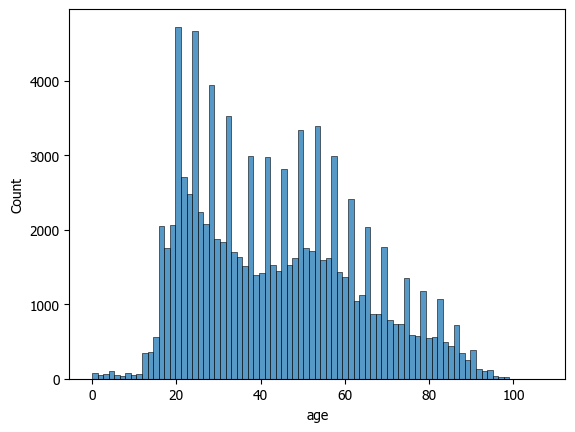

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'
sns.histplot(x=data1['age'])

# ทำการดึงข้อมูลต่างๆเก็บในแต่ละตัวแปร แล้วแปรงเป็น dataFrame พร้อมกับ นำตัวแปรที่ทำการแปรงมาทำการ กำหนด column ที่เป็นของ เดือน
# มาทำการใช้ method counts เพื่อให้่ได้จำนวนผู้เสียชีวิตด้วยปืนของแต่ละเดือน เก็บลงตัวแปร count

In [9]:

filter={
    'year': {
        '$eq': 2012
    }
}
project={
    '_id': 0, 
    'year': 1, 
    'month': 1, 
    'age': 1
}
sort=list({
    'month': 1
}.items())

result2 = mycol.find(
  filter=filter,
  projection=project,
  sort=sort
)
data2 = pd.DataFrame(list(result2))
count =  data2['month'].value_counts()
count

month
7     3026
5     2999
8     2954
9     2852
6     2826
4     2795
12    2791
1     2758
3     2743
10    2733
11    2729
2     2357
Name: count, dtype: int64

# ใช้ seaborn แล้วใช้ method barplot เพื่้อทำ graph รูปแบบ barplot พร้อมกับกดหนดแต่ละแกนด้วยตัวแปร count พร้อมกับให้แสดงค่าในแต่ละ column ในแต่ละกันด้วย .index กับ .values เท่านี้ก็จะได้จำนวนของการตายด้วยอาวุธปืนในแต่ละเดือนของปี 2012

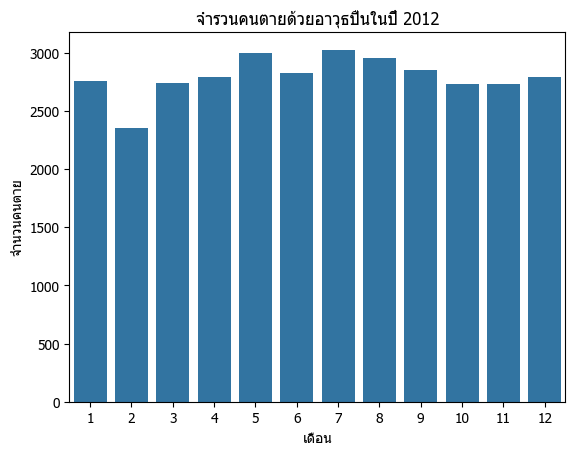

In [10]:
sns.barplot(x=count.index, y=count.values)
plt.title("จำรวนคนตายด้วยอาวุธปืนในปึ 2012")
plt.ylabel('จำนวนคนตาย')
plt.xlabel('เดือน')
plt.show()

# ทำการดึงข้อมูลต่างๆเก็บในแต่ละตัวแปร แล้วแปรงเป็น dataFrame พร้อมกับนำตัวแปรที่เก็บข้อมูลเป็น Dataframe มาใช้ groupby 
# เพื่อนำข้อมูลที่กระจายมาแบ่งกลุ่มข้อมูลปีและสถานที่เพื่อนับจำนวนการเสียชีวิตโดยแบ่งปลุ่มเป็นตามปีและสถานที่ แล้วนับจำนวนเกิดเหตุจาก month โดยใช้ count แล้วทำการ reset_index เพื่อให้จัดตารางให้ดูง่ายขึ้น

In [11]:
filter={
    'year': {
        '$gte': 2012, 
        '$lte': 2014
    }
}
project={
    '_id': 0, 
    'age': 1, 
    'month': 1, 
    'year': 1, 
    'place': 1
}
sort=list({
    'year': 1
}.items())
result3 = mycol.find(
  filter=filter,
  projection=project,
  sort=sort
)
data3 = pd.DataFrame(list(result3))
death_count1 = data3.groupby(['year', 'place'])['month'].count().reset_index()
death_count1

,year,place,month
0,2012,Farm,142
1,2012,Home,19733
2,2012,Industrial/construction,83
3,2012,Other specified,4698
4,2012,Other unspecified,3072
5,2012,Residential institution,66
6,2012,School/instiution,242
7,2012,Sports,46
8,2012,Street,3878
9,2012,Trade/service area,1139


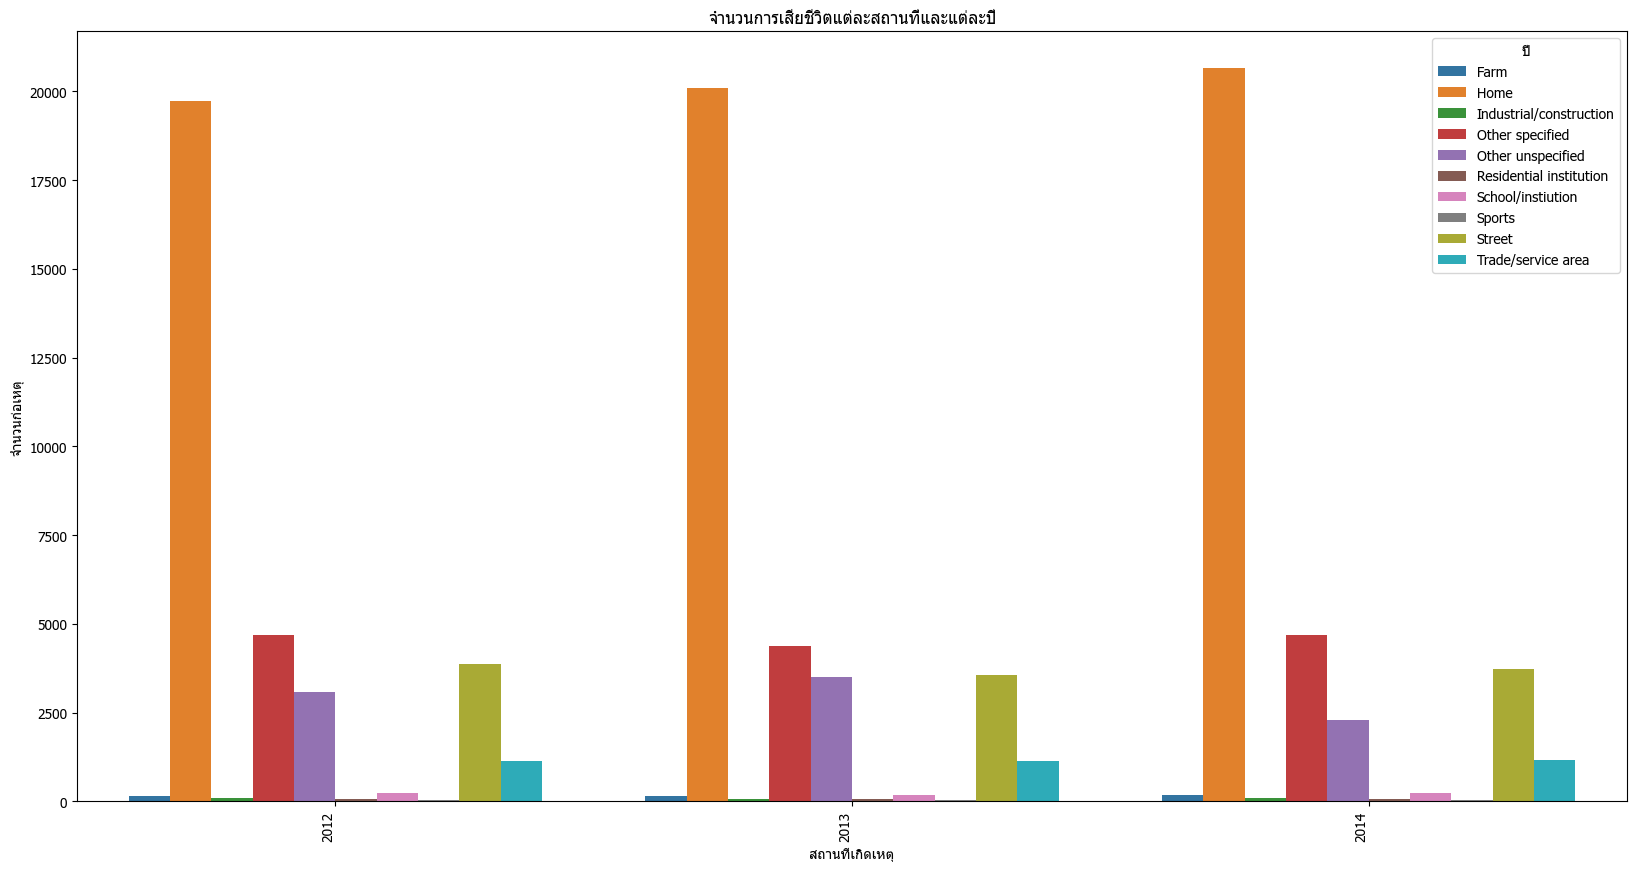

In [12]:
plt.figure(figsize=(20, 10))
sns.barplot(x=death_count1['year'],y =death_count1['month'], hue=death_count1['place'], dodge=True)
plt.title("จำนวนการเสียชีวิตแต่ละสถานที่และแต่ละปี")
plt.xlabel('สถานที่เกิดเหตุ')
plt.ylabel('จำนวนก่อเหตุ')
plt.xticks(rotation=90, ha='right')
plt.legend(title='ปี', bbox_to_anchor=(1, 1))
plt.show()


# ทำการดึงข้อมูลต่างๆเก็บในแต่ละตัวแปร แล้วแปรงเป็น dataFrame พร้อมกับ นำตัวแปรที่เก็บข้อมูลเป็น Dataframe มาใช้ groupby เพื่อแบ่งกลุ่มข้อมูลและจัดกลุ่มของ year และ age  พร้อมกับ count จำนวนว่ามีการตายด้วยอาวุธปืนกี่คน จาก mounth
# แล้วทำการ reset_index เพื่อ ให้ dataset ดูง่าย

In [58]:
filter={
    'year': {
        '$eq': 2012, 
    },
    'age':{
        '$gte' : 0,
        '$lte' : 29
    }
}
project={
    '_id': 0, 
    'year': 1, 
    'month': 1, 
    'age': 1
}
sort=list({
    'month': 1
}.items())

result4 = mycol.find(
  filter=filter,
  projection=project,
  sort=sort
)
data4 = pd.DataFrame(list(result4))
death_count2 = data4.groupby(['year', 'age'])['month'].count().reset_index()
death_count2

,year,age,month
0,2012,0.0,11
1,2012,1.0,13
2,2012,2.0,19
3,2012,3.0,25
4,2012,4.0,13
5,2012,5.0,10
6,2012,6.0,29
7,2012,7.0,18
8,2012,8.0,11
9,2012,9.0,7


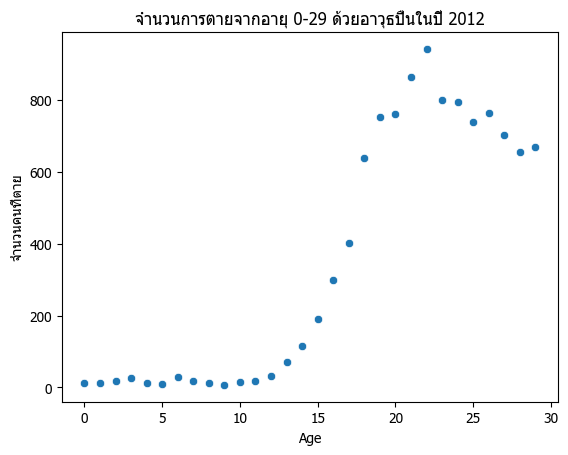

In [59]:
sns.scatterplot(x='age', y='month', data=death_count2)
plt.title('จำนวนการตายจากอายุ 0-29 ด้วยอาวุธปืนในปี 2012')
plt.xlabel('Age')
plt.ylabel('จำนวนคนที่ตาย')
plt.show()

# ทำการกำหนดข้อมูลต่างๆใน data ที่อยู่ใน MongoDB แล้วทำการหาข้อมูลที่ถูกกำหนดเก็บไว้ในข้อมูลที่เป็น object กับ array แล้วทำการเปลี่ยนข้อมูลนั้นจาก json เปลี่ยนมาเป๋็น DataFrame
# แล้วทำการเอาข้อมูลนั้นมาทำการ groupby เป็นการแบ่งประเภทข้อมูลของ column year กับ month แล้วทำการ counth จำนวน police ที่อยู่ในเหตุการ และทำการ reset_index เพื่อให้ข้อมูลนั้นดูง่าย

In [43]:
filter={
    'year': {
        '$gte': 2012, 
        '$lte': 2014
    },
    'police': {
        '$gte' : 1,
    }
}
project={
    '_id': 0, 
    'year': 1, 
    'month': 1,
    'police':1
}
sort=list({
    'year': 1
}.items())
result5 = mycol.find(
  filter=filter,
  projection=project,
  sort=sort
)
data5 = pd.DataFrame(list(result5))
death_count3 = data5.groupby(['year', 'month'])['police'].count().reset_index()

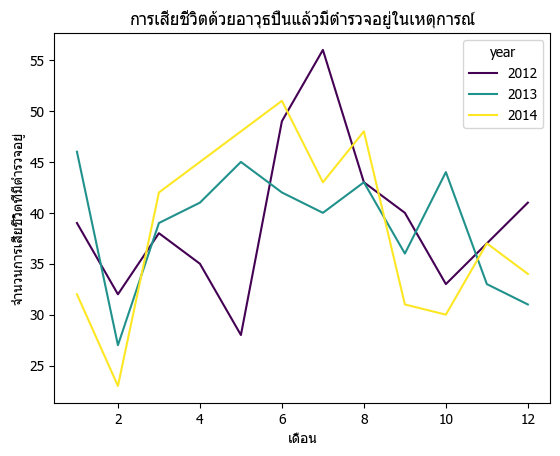

In [51]:
sns.lineplot(x='month', y='police', hue='year' , data=death_count3, palette='viridis')
plt.title('การเสียชีวิตด้วยอาวุธปืนแล้วมีตำรวจอยู่ในเหตุการณ์')
plt.xlabel('เดือน')
plt.ylabel('จำนวนการเสียชีวิตที่มีตำรวจอยู่')
plt.show()

In [77]:
filter={
    'year': {
        '$eq': 2013
    }
}
project={
    '_id': 0, 
    'month': 1, 
    'age': 1, 
    'year': 1
}
sort=list({
    'age': 1
}.items())
result6 = mycol.find(
  filter=filter,
  projection=project,
  sort=sort
)
data6 = pd.DataFrame(list(result6))
data6

,year,month,age
0,2013,5,NaN
1,2013,5,NaN
2,2013,5,NaN
3,2013,5,NaN
4,2013,5,NaN
...,...,...,...
33631,2013,7,98.0
33632,2013,6,98.0
33633,2013,9,98.0
33634,2013,10,100.0


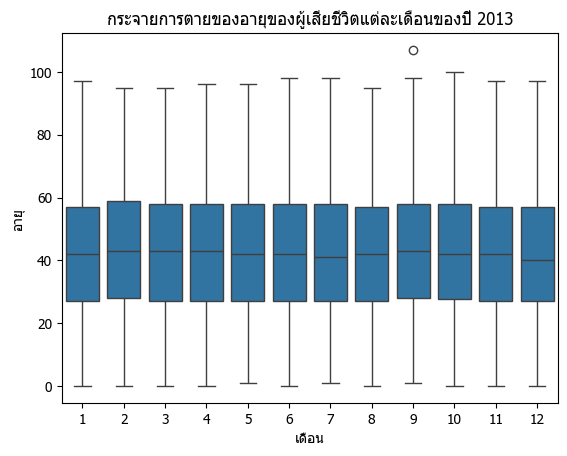

In [78]:
sns.boxplot(x='month', y='age', data=data6)
plt.title('กระจายการตายของอายุของผู้เสียชีวิตแต่ละเดือนของปี 2013')
plt.xlabel('เดือน')
plt.ylabel('อายุ')
plt.show()
